#K-Nearest Neighbors (KNN) Algorithm Tutorial - Machine Learning Basics

* Tutorial: https://news.towardsai.net/knn
* Github: https://github.com/towardsai/tutorials/tree/master/k-nearest-neighbors

In [1]:
# import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
# Import the iris dataset as provided by the sklearn Python module

from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# Check the type of the iris data set using type(iris)

# YOUR CODE HERE
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
# Converting sklearn data into Pandas dataframe
# target variables imply
# 0.0 - Setosa
# 1.0 - Versicolor
# 2.0 - Virginica

iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])


# look up the pandas command to output the head (first couple of lines) of the iris dataframe
# YOUR CODE HERE
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Checking for outliers and imbalanced data

<Axes: xlabel='target', ylabel='count'>

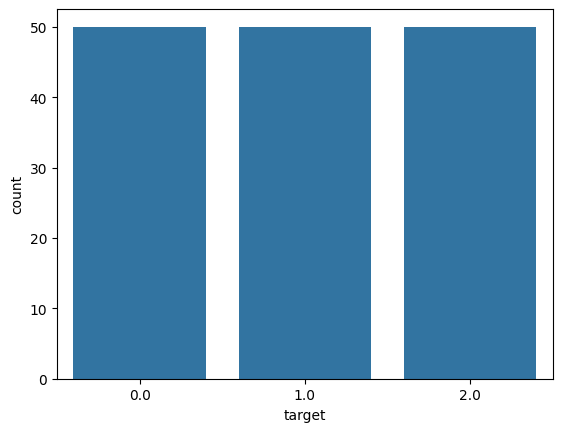

In [5]:
# data is perfectly balance

# use whatever plot you would like to visualize the count of the three different target variables 0,1,2, which correspond to type of iris flower
# (Setosa, Versicolor, and Virginica)

# YOUR CODE HERE
sns.countplot(x='target', data=iris)

# what is the distribution of the target variables?

# They are all about 50

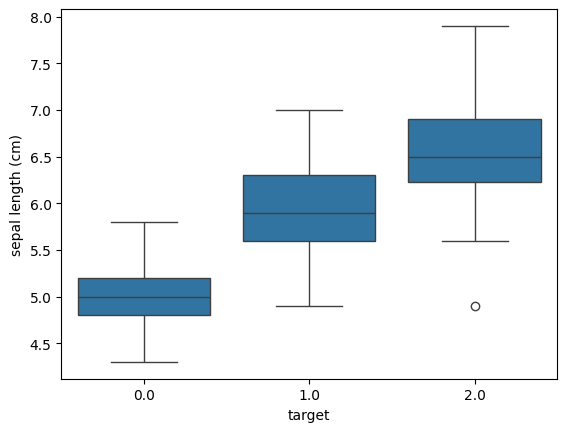

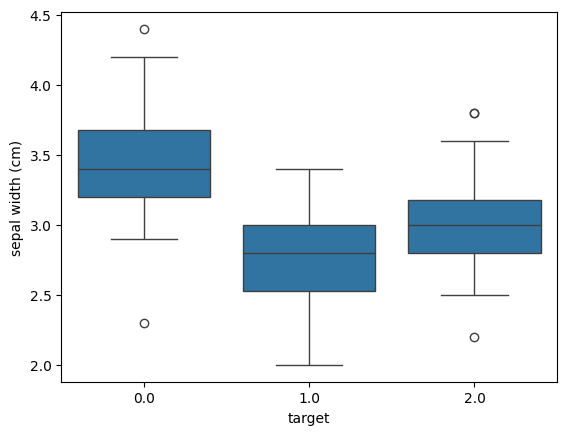

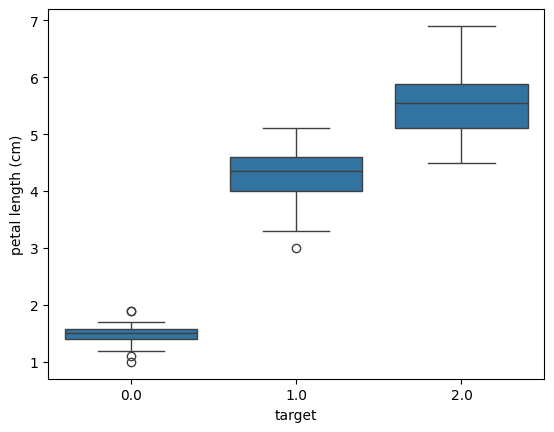

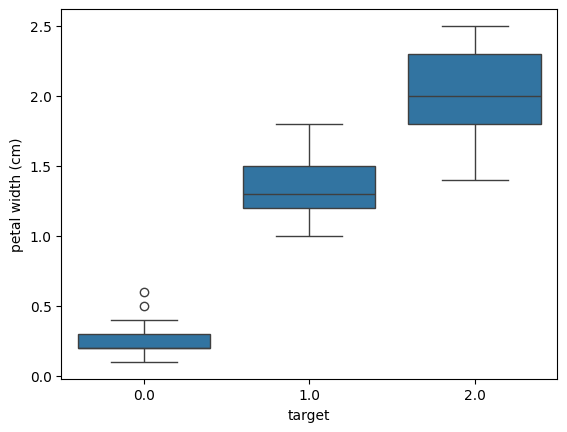

In [6]:
# for each of the features and for each target, make box plots to check for outliers.

# YOUR CODE HERE
for feature in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:
  sns.boxplot(x='target', y=feature, data=iris)
  plt.show()

# are there any outliers? # not many of outliers to be handled

# 4

## Plotting a 2-D graph

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

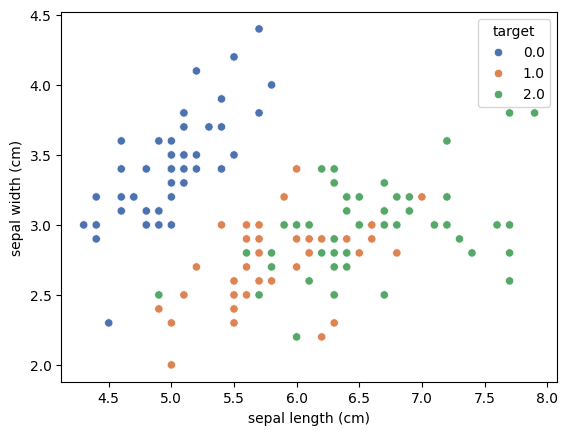

In [7]:
# make a 2d graph of sepal width vs sepal legnth. color by target

# YOUR CODE HERE
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, hue='target', palette="deep")

# what can you say about the targets based on their sepal lengths and widths? They kinda separate (esp target 0)

# YOUR ANSWER HERE

## Separating features and target

In [8]:
# X variable contains flower features
# Y variable contains target values
X = iris.drop(['target'], axis=1)
y = iris['target']

## Split the dataset into train and test sets

In [23]:
# look up the documentation for sklearns train_test_split, and split the X and y datasets into 60% for training and 40% for testing
# 60% of the data will be randomly selected at training data
# remaining 40% as testing data

# set the random state to 0 if you want your train, test split to be reproducible

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## Initial model

In [24]:
# look up sklearn documentation on how to initilaize a K neighbors classifier. Set the initial value of n_neighbors to be 1
# later, we will replace k with an optimal value
# name your classifier knn


# YOUR CODE HERE

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 1)


# use knn.fit to fit/train your model your X test set.

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


# use to metrics.accuracy_score to determine how well your model performs on the test set

# YOUR CODE HERE

accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
# interpret your results here

# YOUR ANSWER HERE

0.9166666666666666


## Finding the right k-value

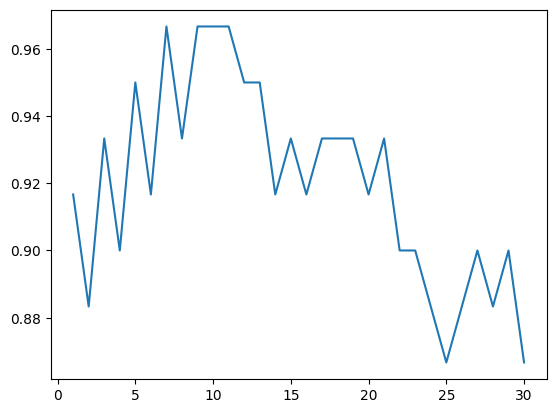

In [29]:
# we want to find the value of k that maximizes our accuracy score

# choose a range of k-values that you would like to check by using list(range(a,b)), where a and b are both integers. name this range k_range

k_range = list(range(1, 31))

# instantiate an empty list called scores to keep track of the scores at each k value

# YOUR CODE HERE
scores = []

# model fitting and calculating accuracy score
# make a for loop that trains a knn and scores the accuracy for each value of k in your k_range

# YOUR CODE HERE
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = knn.score(X_test, y_test)
    scores.append(accuracy)

# plot the accuracy score vs the value of k

# YOUR CODE HERE
plt.plot(k_range, scores)
plt.show()

## Accuracy for optimal k-value

In [33]:
# what is the optimal value of k for this dataset? 7

# YOUR CODE HERE
optimal_k = k_range[scores.index(max(scores))]

# fit the knn with the optimal value of k and print the score

# YOUR CODE HERE
optimal_knn = KNeighborsClassifier(n_neighbors=optimal_k)
optimal_knn.fit(X_train, y_train)
optimal_score = optimal_knn.score(X_test, y_test)

print(optimal_k)
print(scores)

7
[0.9166666666666666, 0.8833333333333333, 0.9333333333333333, 0.9, 0.95, 0.9166666666666666, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.95, 0.95, 0.9166666666666666, 0.9333333333333333, 0.9166666666666666, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9166666666666666, 0.9333333333333333, 0.9, 0.9, 0.8833333333333333, 0.8666666666666667, 0.8833333333333333, 0.9, 0.8833333333333333, 0.9, 0.8666666666666667]


## Predicting class of new data

In [36]:
# instantiate a new knn with n_neigbors as the optimal k

# YOUR CODE HERE
optimal_k = 7
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# now fit the model with the whole dataset without splitting into train and test splits

# YOUR CODE HERE

knn.fit(X, y)

# Test your model on data that has not been seen yet!
# new data to be classified
X_new = np.array([[1, 2.9, 10, 0.2]])

# make and print your prediction for X_new

# YOUR CODE HERE
prediction = knn.predict(X_new)
print(prediction)

# what type of iris flower is X_new?

# Virginica

[2.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
